# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [93]:
result = merge_df.dtypes
result

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [94]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()



249

In [95]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df["Mouse ID"] == "g989"]

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] != "g989"].copy()
clean_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [98]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [99]:
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [100]:
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

volume_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_median= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_stdev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
volume_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df1 = pd.DataFrame({
    
    "Mean Tumor Volume" : volume_mean,
    "Median Tumor Volume" : volume_median,
    "Tumor Volume Variance" : volume_variance,
    "Tumor Volume Std. Dev." : volume_stdev,
    "Tumor Volume Std. Err." : volume_sem,
    
})
summary_df1

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median', "var", "std", 'sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

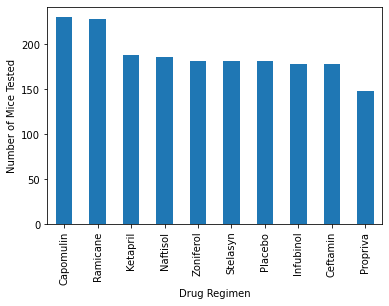

In [103]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

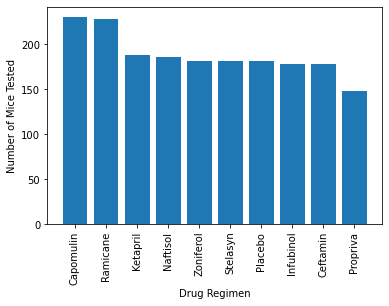

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mice_count.index, mice_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()

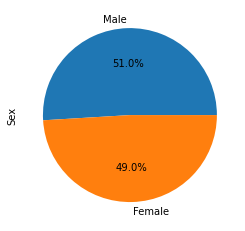

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sexpd = clean_df['Sex'].value_counts()
mice_sexpd.plot(kind="pie",autopct= "%1.1f%%")

plt.ylabel("Sex")
plt.show()


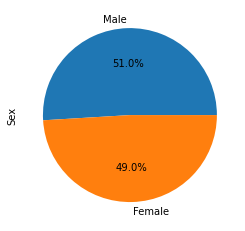

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_df["Sex"].value_counts()
labels = ["Male", "Female"]
plt.ylabel("Sex")

plt.pie(mice_sex, labels = labels, autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
max_time = clean_df.groupby('Mouse ID')
max_time = max_time.max()

cap_max = capomulin_df.groupby("Mouse ID")[ "Timepoint"].max()
ram_max = ramicane_df.groupby("Mouse ID")[ "Timepoint"].max()
inf_max = infubinol_df.groupby("Mouse ID")[ "Timepoint"].max()
cef_max = ceftamin_df.groupby("Mouse ID")[ "Timepoint"].max()

tumor_vol = pd.concat([cap_max, ram_max, inf_max, cef_max])

tumor_vol = tumor_vol.reset_index()


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = tumor_vol.merge(clean_df, on=["Mouse ID", 'Timepoint'], how="inner")
merged_df


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
..      ...        ...          ...     ...         ...         ...   
95     x226          0     Ceftamin    Male          23          28   
96     x581         45     Ceftamin  Female          19          28   
97     x822         45     Ceftamin    Male           3          29   
98     y769         45     Ceftamin  Female           6          27   
99     y865         45     Ceftamin    Male          23          26   

    Tumor Volume (mm3)  Metastatic Sites  
0            38.982878                 2  
1            38.939633                 0  
2            30.485985                 0  
3            37.074024                 1  
4            40.159220                 2  
..                 ...               ...  
95           45.000000                 0  
96           64.634949                 3  
97           61.386660                 3  
98           68.594745                 4  
99           64.729837                 3  

[100 rows x 8 columns]

In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#treatments = ['Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment, :]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_volumes)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    low_q = quartiles[0.25]
    upp_q = quartiles[0.75]
    iqr = upp_q-low_q
    lower = low_q - (1.5*iqr)
    upper = upp_q + (1.5*iqr)
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower) | (tumor_volumes > upper)]
    print(f"{treatment}: {outliers}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


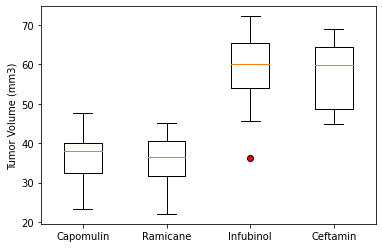

In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0)

flierprops = dict(marker = 'o', markerfacecolor = 'r', markeredgecolor = 'black' )
plt.boxplot(tumor_list, labels=treatments, flierprops = flierprops)
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

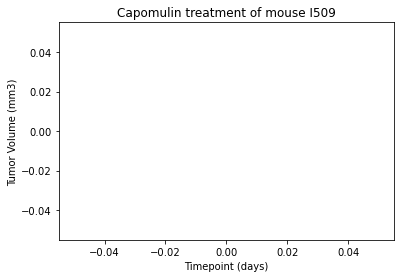

In [125]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'i509')]
plt.plot(cap['Timepoint'], cap['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')
plt.show()

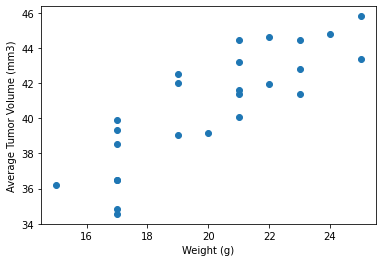

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regime
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
group_df = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(group_df['Weight (g)'], group_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

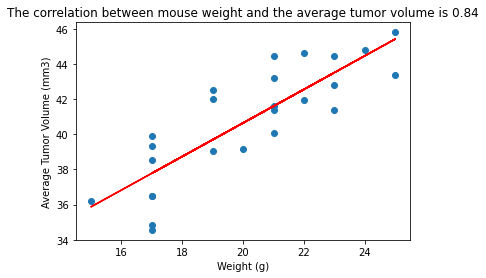

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
group_df = capomulin_df.groupby(['Mouse ID']).mean()
correlation = st.pearsonr(group_df['Weight (g)'], group_df['Tumor Volume (mm3)'])

slope, intercept, rvalue, pvalue, stderr = st.linregress(group_df['Weight (g)'], group_df['Tumor Volume (mm3)'])
regress_values = group_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(group_df['Weight (g)'], group_df['Tumor Volume (mm3)'])
plt.plot(group_df['Weight (g)'], regress_values, color='red')

plt.title("The correlation between mouse weight and the average tumor volume is 0.84")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
